# Requirements

In [236]:
import pandas as pd
import numpy as np
import geopandas as gpd
from scipy.stats import pearsonr

import nltk

import sddk

# PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
from matplotlib.patches import Patch
import geoplot as gplt

In [114]:
s = sddk.cloudSession("sciencedata.dk", "SDAM_root", "648597@au.dk")
figpath = "SDAM_data/social_diversity/socdiv_figures/"

# global parameters for plots
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    #each figure to be saved in four different versions
    fig.savefig("../figures/" + fig_name + ".eps", format="eps")
    fig.savefig("../figures/" + fig_name + ".png")
    s.write_file(figpath + fig_name + ".eps", fig)
    s.write_file(figpath + fig_name + ".png", fig)

connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


# Import datasets

In [5]:
LIRE = gpd.read_parquet("../data/large_data/LIRE_occupsorgs_cats.parquet")

In [6]:
# mask
before235 = LIRE["not_before"] < 235

In [7]:
LIRE[LIRE["is_western"]]

,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,...,medium_city_dist,small_city_ID,small_city_geo,small_city_dist,urban_context_alt,occups,occups_N,organizations,organizations_N,occups_cats
219,EDCS-21300235,"CIL 06, 00882 (p 3777, 4302, 4367) = CIL 06, 3...",Aegyptus,Aegyptus,Al Iskandariyah / Alexandria,"['Al Iskandariyah', 'Alexandria']",20,,"['Augusti/Augustae', 'tituli sacri', 'viri']",tituli sacri,...,9998.65,1002,"[12.395451, 42.021684]",15756.86,large,[faber],1,[],0,"[Production and related workers, transport equ..."
290,EDCS-12800362,"AE 1964, 00222",Aemilia / Regio VIII,Aemilia / Regio VIII,Bagno di Romagna,Bagno di Romagna,200,,"['tituli sacri', 'viri']",tituli sacri,...,41767.45,937,"[11.903398, 43.983123]",17068.12,rural,[],0,[],0,[]
291,EDCS-09300206,"AE 1976, 00204",Aemilia / Regio VIII,Aemilia / Regio VIII,Bologna / Bononia,"['Bologna', 'Bononia']",50,,"['mulieres', 'tituli sepulcrales', 'tria nomin...",tituli sepulcrales,...,330.60,1012,"[11.470525, 44.443585]",11359.10,medium,[],0,[],0,[]
292,EDCS-09300210,"AE 1976, 00208",Aemilia / Regio VIII,Aemilia / Regio VIII,Bologna / Bononia,"['Bologna', 'Bononia']",50,,"['liberti/libertae', 'mulieres', 'tituli sepul...",tituli sepulcrales,...,330.60,1012,"[11.470525, 44.443585]",11359.10,medium,[],0,[],0,[]
293,EDCS-09300215,"AE 1976, 00213",Aemilia / Regio VIII,Aemilia / Regio VIII,Bologna / Bononia,"['Bologna', 'Bononia']",100,,"['mulieres', 'tituli sepulcrales', 'tria nomin...",tituli sepulcrales,...,330.60,1012,"[11.470525, 44.443585]",11359.10,medium,[],0,[],0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137300,EDCS-10700071,"SupIt-12-IC, 00047 = IulCarnicum-02, 00125",Venetia et Histria / Regio X,Venetia et Histria / Regio X,Zuglio / Iulium Carnicum,"['Zuglio', 'Iulium Carnicum']",200,,{ },{ },...,79599.13,1054,"[13.025796, 46.460796]",112.68,small,[],0,[],0,[]
137301,EDCS-10700072,"SupIt-12-IC, 00048 = IulCarnicum-02, 00137",Venetia et Histria / Regio X,Venetia et Histria / Regio X,Zuglio / Iulium Carnicum,"['Zuglio', 'Iulium Carnicum']",200,,{ },{ },...,79599.13,1054,"[13.025796, 46.460796]",112.68,small,[],0,[],0,[]
137302,EDCS-10700073,"SupIt-12-IC, 00049 = IulCarnicum-02, 00134",Venetia et Histria / Regio X,Venetia et Histria / Regio X,Zuglio / Iulium Carnicum,"['Zuglio', 'Iulium Carnicum']",200,,{ },{ },...,79599.13,1054,"[13.025796, 46.460796]",112.68,small,[],0,[],0,[]
137303,EDCS-10700074,"SupIt-12-IC, 00050 = IulCarnicum-02, 00115",Venetia et Histria / Regio X,Venetia et Histria / Regio X,Zuglio / Iulium Carnicum,"['Zuglio', 'Iulium Carnicum']",25,,{ },{ },...,79599.13,1054,"[13.025796, 46.460796]",112.68,small,[],0,[],0,[]


In [8]:
LIRE.head(5)

,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,...,medium_city_dist,small_city_ID,small_city_geo,small_city_dist,urban_context_alt,occups,occups_N,organizations,organizations_N,occups_cats
0,EDCS-03700724,"ZPE-108-159 = Thesprotia 00001 = AE 1993, 0140...",Achaia,Achaia,Agios Athanasios / Photike,"['Agios Athanasios', 'Photike']",313,,"['Augusti/Augustae', 'litterae erasae', 'ordo ...",tituli honorarii,...,37687.28,31,"[20.787767, 39.546432]",10725.84,rural,[],0,[],0,[]
1,EDCS-03300852,"AE 1995, 01409",Achaia,Achaia,Alea / Tegea,"['Alea', 'Tegea']",276,to 276; b: 276 to 282 \n\n,"['Augusti/Augustae', 'miliaria', 'viri']",miliaria,...,23430.85,73,"[22.336587, 37.462155]",7876.09,large,[],0,[],0,[]
2,EDCS-28500283,"CIL 03, 07251 = D 00214 = NDIEC-07, p 81 = AE ...",Achaia,Achaia,Alea / Tegea,"['Alea', 'Tegea']",50,,"['Augusti/Augustae', 'leges', 'viri']",leges,...,23430.85,73,"[22.336587, 37.462155]",7876.09,large,[],0,[],0,[]
3,EDCS-09400671,"CIMRM-02, 02350 = IG-12, 00274 = Andros 00124 ...",Achaia,Achaia,Andros,Andros,209,,"['litterae erasae', 'tituli sacri']",tituli sacri,...,60414.04,47,"[24.34625, 37.633122]",47547.59,rural,[],0,[],0,[]
4,EDCS-24600769,"AE 1995, 01407 = AE 2001, 01812",Achaia,Achaia,Archea Olimpia / Archaia Olympia / Olympia,"['Archea Olimpia', 'Archaia Olympia', 'Olympia']",96,,{ },{ },...,45272.69,35,"[21.435443, 37.827452]",26125.55,large,[],0,[],0,[]


In [9]:
len(LIRE[before235])

115926

In [10]:
LIRE[before235]["occups_N"].sum()

4810

In [11]:
LIRE[before235]["occups_N"].sum() / LIRE["occups_N"].sum()

0.9172387490465294

In [12]:
roman_cities = gpd.read_file("../data/roman_cities_pop.geojson")
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson")
pleiades_regions_west = gpd.read_file("../data/pleiades_regions_west.geojson")

# Map inscriptions on cities

In [209]:
def get_my_city(row):
    context = row["urban_context_alt"]
    try:
        ID = row[context + "_city_ID"]
    except:
        ID = None
    return ID
LIRE["city_ID"] = LIRE.apply(lambda row: get_my_city(row), axis=1)

In [14]:
def get_inscriptions(ID):
    city_dict = {}
    city_data = LIRE[LIRE["city_ID"]==str(ID)]
    if len(city_data) > 0:
        city_dict["inscr_N"] = len(city_data)
        inscr_texts = city_data["clean_text_interpretive_word"].tolist()
        inscr_texts = [el for el in inscr_texts if isinstance(el, str)]
        city_dict["inscr_texts_wordlist"] = " ".join(inscr_texts).split()
        city_dict["edcs_ids"] = city_data["EDCS-ID"].tolist()
        city_dict["edh_ids"] = city_data["EDH-ID"].tolist()
        city_dict["inscr_with_occups"] = (city_data["occups_N"]>0).sum()
        city_dict["occups_mask"] = city_data["occups_N"] > 0
        city_dict["occups_list"] = [el for sublist in city_data["occups"] for el in sublist]
        city_dict["occups_N"] = city_data["occups_N"].sum()
        city_dict["occups_cats_list"] = [el for sublist in city_data["occups_cats"] for el in sublist]
    return city_dict

cities_dict_data = roman_cities["ID"].apply(get_inscriptions)

In [15]:
cities_inscr_data = pd.DataFrame(cities_dict_data.tolist())
cities_inscr_data.head(5)

,inscr_N,inscr_texts_wordlist,edcs_ids,edh_ids,inscr_with_occups,occups_mask,occups_list,occups_N,occups_cats_list
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,"[Caius, Varius, Stratullus, Γάϊος, Οὐάριος, Στ...",[EDCS-45800005],[HD006767],0.0,"192 False Name: occups_N, dtype: bool",[],0.0,[]
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
roman_cities = pd.concat([roman_cities, cities_inscr_data], axis=1)

In [17]:
del cities_inscr_data
del cities_dict_data

# Explore inscriptions within cities

In [18]:
roman_cities.head(5)

,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Barrington Atlas Rank,Barrington Atlas Reference,Start Date,End Date,Select Bibliography,...,geometry,inscr_N,inscr_texts_wordlist,edcs_ids,edh_ids,inscr_with_occups,occups_mask,occups_list,occups_N,occups_cats_list
0,Hanson2016_1,Abae,Kalapodi,Achaea,Greece,4 or 5,55 D3,-600,NaN,BNP; Hansen 2006; Hansen and Nielsen 2004; PEC...,...,POINT (22.93333 38.58333),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hanson2016_2,Acharnae,Acharnes,Achaea,Greece,3,59 B2,-600,NaN,BNP; DGRG; PECS; Sear 2006.,...,POINT (23.73409 38.08347),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hanson2016_3,Acraephia,Akraifnio,Achaea,Greece,3,55 E4,-600,NaN,BNP; DGRG; Hansen and Nielsen 2004; PECS; Sear...,...,POINT (23.21970 38.45261),1.0,"[Caius, Varius, Stratullus, Γάϊος, Οὐάριος, Στ...",[EDCS-45800005],[HD006767],0.0,"192 False Name: occups_N, dtype: bool",[],0.0,[]
3,Hanson2016_4,Aegina,Aigina,Achaea,Greece,2,59 A3,-600,NaN,BNP; DGRG; Hansen 2006; Hansen and Nielsen 200...,...,POINT (23.42850 37.75007),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hanson2016_5,Aegira,Aigeira,Achaea,Greece,3,58 C1,-600,NaN,DGRG; Hansen and Nielsen 2004.,...,POINT (22.35572 38.14795),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# all cities
len(roman_cities)

1388

In [20]:
roman_cities["inscr_N"].sum()

110163.0

In [21]:
# cities with at least one inscription
(roman_cities["inscr_N"]>0).sum()

856

In [22]:
# proportion of cities with at least one inscription
(roman_cities["inscr_N"]>0).mean()

0.6167146974063401

In [23]:
# N western cities
(roman_cities["western_province"]).sum()

889

In [24]:
((roman_cities["western_province"]) & (roman_cities["inscr_N"]>0)).sum()

657

In [25]:
((roman_cities["western_province"]) & (roman_cities["inscr_N"]>0)).sum() / (roman_cities["western_province"]).sum()

0.7390326209223848

# Focus on western cities alone - basic explorations (feel free to skip)

In [26]:
roman_cities = roman_cities[roman_cities["western_province"]]
len(roman_cities)

889

In [27]:
roman_cities["pop_est_log"] = np.log(roman_cities["pop_est"])
roman_cities["inscr_N_log"] = np.log(roman_cities["inscr_N"])

roman_cities["pop_est_log10"] = np.log10(roman_cities["pop_est"])
roman_cities["inscr_N_log2"] = np.log2(roman_cities["inscr_N"])

roman_cities["occups_N_log"] = np.log2(roman_cities["occups_N"])


/Users/kasev/Projects/social_diversity/socdiv_venv/lib/python3.10/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Measuring Specialization and Diversity

In [28]:
len(roman_cities)

889

In [29]:
(roman_cities["occups_N"]>0).sum()

313

In [30]:
roman_cities["occups_N"].max()

1855.0

In [31]:
# roman cities western with at least one occupations
roman_cities_wo = roman_cities[roman_cities["occups_N"]>0].copy()

In [32]:
roman_cities_wo

,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Barrington Atlas Rank,Barrington Atlas Reference,Start Date,End Date,Select Bibliography,...,inscr_with_occups,occups_mask,occups_list,occups_N,occups_cats_list,pop_est_log,inscr_N_log,pop_est_log10,inscr_N_log2,occups_N_log
159,Hanson2016_160,Acholla,Henchir Bou Tria,Africa Proconsularis,Tunisia,4 or 5,33 H2,-200,NaN,BNP; Boatwright 2000; Bomgardner 2000; DGRG; G...,...,1.0,"54970 True Name: occups_N, dtype: bool",[curator],1.0,[Administrative and managerial workers],6.907755,0.000000,3.000000,0.000000,0.000000
165,Hanson2016_166,Avitta,Henchir Bou Ftis,Africa Proconsularis,Tunisia,3,32 E4,-50,NaN,BNP; Boatwright 2000; Lepelley 1979-1981; Russ...,...,5.0,879 False 880 False 882 False 8...,"[scaenicus, curator, tonsor, possessor, faber]",5.0,"[Professional, technical and related workers, ...",8.905987,3.806662,3.867821,5.491853,2.321928
171,Hanson2016_172,Carthago,Tunis,Africa Proconsularis,Tunisia,1,32 F3,-49,NaN,Bomgardner 2000; Brunt 1971; Cornell and Mathe...,...,9.0,857 False 858 False 859 False 8...,"[curator, mesor, curator, mensor, agrimensor, ...",9.0,"[Administrative and managerial workers, Profes...",11.533453,6.163315,5.008915,8.891784,3.169925
174,Hanson2016_175,Clupea,Kelibia,Africa Proconsularis,Tunisia,4 or 5,32 H3,-310,NaN,BNP; Brunt 1971; Cornell and Mathews 1982; DGR...,...,1.0,1115 False 1116 False 1117 False 1118...,[sartor],1.0,"[Agricultural, animal husbandry and forestry w...",6.907755,2.639057,3.000000,3.807355,0.000000
177,Hanson2016_178,Hadrumetum,Sousse,Africa Proconsularis,Tunisia,3,33 G1,-150,NaN,BNP; Brunt 1971; DGRG; Lepelley 1979-1981; Mac...,...,1.0,875 False 1133 False 1387 False 1...,"[faber, faber]",2.0,"[Production and related workers, transport equ...",10.480803,2.564949,4.551755,3.700440,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Hanson2016_1298,Catania,Catania,Sicilia,Italy,3,47 G3,-729,NaN,Benario 1981; Brunt 1971; Cornell and Mathews ...,...,1.0,49004 False 49005 False 49006 Fals...,[faber],1.0,"[Production and related workers, transport equ...",10.247432,4.787492,4.450403,6.906891,0.000000
1311,Hanson2016_1312,Messana,Messina,Sicilia,Italy,3,47 H2,-730,NaN,Brunt 1971; Cornell and Mathews 1982; Hansen 2...,...,1.0,49009 False 49010 False 49011 Fals...,[faber],1.0,"[Production and related workers, transport equ...",9.351579,1.791759,4.061339,2.584963,0.000000
1315,Hanson2016_1316,Panormus,Palermo,Sicilia,Italy,2,47 C2,-700,NaN,Beloch 1886; BNP; Brunt 1971; Cornell and Math...,...,1.0,49012 False 128502 False 128503 Fals...,"[curator, curator]",2.0,"[Administrative and managerial workers, Admini...",8.521584,3.367296,3.700877,4.857981,1.000000
1317,Hanson2016_1318,Segesta,Segesta,Sicilia,Italy,3,47 B3,-600,NaN,McEvedy 2011; PECS; Sear 2006; Woloch 1983.,...,1.0,128341 False 128342 False 128343 Fals...,[forensis],1.0,[Administrative and managerial workers],8.405367,3.332205,3.650405,4.807355,0.000000


In [33]:
# generate a dictionary of occupations by type
occupations_df = pd.read_csv("../data/occupations_list_hisco.csv")
occups_cats_dict = dict(zip(occupations_df["Term"], occupations_df["Harris_Category"]))

In [34]:
print(len(set(occups_cats_dict.values())))
set(occups_cats_dict.values())

19


{'Building',
 'Clothing',
 'Death-care sector',
 'Education',
 'Finance',
 'Food-Production',
 'Food-Retail',
 'Fuel / Raw material',
 'Glass-Working',
 'Household Goods',
 'Managerial',
 'Metal-Working',
 'Miscellaneous Services',
 'Performing Arts',
 'Plastic Arts',
 'Retail',
 'Transport',
 'Unclear meaning',
 'Water-Management'}

In [35]:
occups_cats_labels = list(set(occups_cats_dict.values()))
occups_cats_labels

['Education',
 'Building',
 'Clothing',
 'Fuel / Raw material',
 'Food-Retail',
 'Water-Management',
 'Unclear meaning',
 'Retail',
 'Transport',
 'Miscellaneous Services',
 'Glass-Working',
 'Plastic Arts',
 'Food-Production',
 'Metal-Working',
 'Performing Arts',
 'Managerial',
 'Finance',
 'Household Goods',
 'Death-care sector']

In [36]:
def cat_for_occup(list_of_occups):
    try:
        return [occups_cats_dict[occup] for occup in list_of_occups]
    except:
        return []
roman_cities_wo["occups_cats_list"] = roman_cities_wo["occups_list"].apply(cat_for_occup)

In [37]:
roman_cities_wo["occups_cats_unique_N"] = roman_cities_wo["occups_cats_list"].apply(lambda x: len(set(x)))
roman_cities_wo["occups_cats_unique_N"]

159     1
165     4
171     3
174     1
177     1
       ..
1297    1
1311    1
1315    1
1317    1
1321    1
Name: occups_cats_unique_N, Length: 313, dtype: int64

Text(0, 0.5, 'N cities')

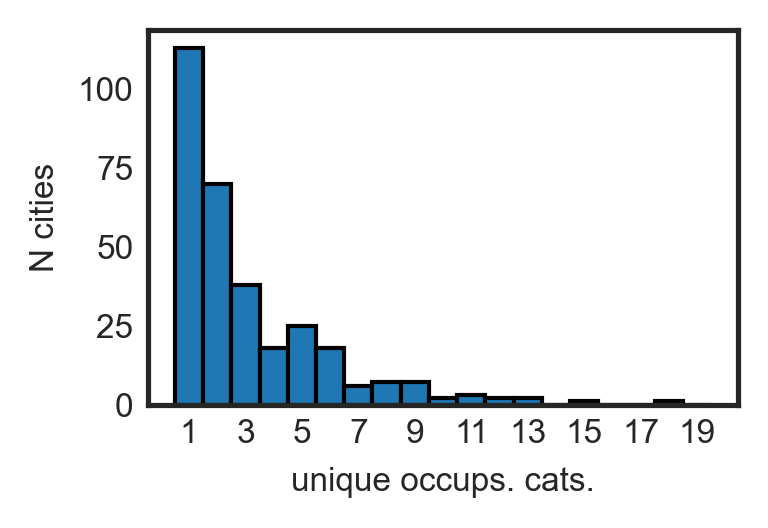

In [38]:
fig, ax = plt.subplots(figsize=(2.6, 1.8), tight_layout=True)
bins = [n+0.5 for n in range(0,20)]
roman_cities_wo["occups_cats_unique_N"].hist(ax=ax, edgecolor="black", bins=bins)
ax.set_xticks(range(1,20, 2))
ax.grid(False)
ax.set_xlabel("unique occups. cats.")
ax.set_ylabel("N cities")

In [39]:
save_figure(fig, "unique_cats_per_cities_hist")

A file with the same name ("unique_cats_per_cities_hist.eps") already exists in this location.
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/unique_cats_per_cities_hist.eps"
A file with the same name ("unique_cats_per_cities_hist.png") already exists in this location.
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/unique_cats_per_cities_hist.png"


In [40]:
roman_cities_wo["occups_cats_unique_N"]

159     1
165     4
171     3
174     1
177     1
       ..
1297    1
1311    1
1315    1
1317    1
1321    1
Name: occups_cats_unique_N, Length: 313, dtype: int64

In [42]:
roman_cities_wo["occups_cats_list"]

159                                          [Managerial]
165     [Performing Arts, Managerial, Miscellaneous Se...
171     [Managerial, Miscellaneous Services, Manageria...
174                              [Miscellaneous Services]
177                        [Metal-Working, Metal-Working]
                              ...                        
1297                                      [Metal-Working]
1311                                      [Metal-Working]
1315                             [Managerial, Managerial]
1317                                         [Managerial]
1321                             [Managerial, Managerial]
Name: occups_cats_list, Length: 313, dtype: object

# Specialization

In [43]:
def get_cat_row_vec(cat_list):
    cat_row_vec = []
    for cat in occups_cats_labels:
        cat_row_vec.append(cat_list.count(cat))
    return np.array(cat_row_vec)

In [44]:
roman_cities_wo["occups_cats_vec"] = roman_cities_wo["occups_cats_list"].apply(get_cat_row_vec)
roman_cities_wo["occups_cats_vec"]

159     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
165     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...
171     [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 1, 0, ...
174     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
177     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, ...
                              ...                        
1297    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
1311    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
1315    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1317    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1321    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: occups_cats_vec, Length: 313, dtype: object

In [45]:
def occups_cats_vec_weighted(occups_cat_vec):
    a = np.array(occups_cat_vec, dtype=float)
    a = a / sum(a)
    return a
roman_cities_wo["shares_vec"] = roman_cities_wo["occups_cats_vec"].apply(occups_cats_vec_weighted)
roman_cities_wo["shares_vec"]

159     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
165     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
171     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
174     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
177     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
1297    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1311    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1315    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1317    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1321    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: shares_vec, Length: 313, dtype: object

In [46]:
roman_cities_wo["ZI"] = roman_cities_wo["shares_vec"].apply(max)
roman_cities_wo["ZI"]

159     1.000000
165     0.400000
171     0.666667
174     1.000000
177     1.000000
          ...   
1297    1.000000
1311    1.000000
1315    1.000000
1317    1.000000
1321    1.000000
Name: ZI, Length: 313, dtype: float64

In [47]:
roman_cities_wo["ZI_cat"] = roman_cities_wo["shares_vec"].apply(lambda x: occups_cats_labels[np.argmax(x)])
roman_cities_wo["ZI_cat"]

159                 Managerial
165                 Managerial
171     Miscellaneous Services
174     Miscellaneous Services
177              Metal-Working
                 ...          
1297             Metal-Working
1311             Metal-Working
1315                Managerial
1317                Managerial
1321                Managerial
Name: ZI_cat, Length: 313, dtype: object

In [145]:
roman_cities_wo.sort_values("ZI", ascending=False)[["Ancient Toponym", "inscr_N", "occups_N", "occups_cats_unique_N","occups_cats_vec", "ZI"]]

,Ancient Toponym,inscr_N,occups_N,occups_cats_unique_N,occups_cats_vec,ZI
159,Acholla,1.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000
605,Cabillonum,28.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1.000000
855,Grumentum,16.0,2.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000
862,Potentia (Italia (III Lucania et Brutii)),17.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000
871,Aequi,26.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000
...,...,...,...,...,...,...
789,Pompeii,3300.0,56.0,11,"[0, 3, 3, 0, 0, 0, 0, 7, 1, 10, 0, 2, 3, 7, 9,...",0.178571
1268,Brigetio,440.0,17.0,9,"[0, 0, 3, 0, 0, 0, 0, 2, 1, 3, 0, 1, 1, 2, 0, ...",0.176471
785,Norba,106.0,12.0,8,"[0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, ...",0.166667
1045,Ateste,128.0,6.0,6,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",0.166667


In [147]:
roman_cities_wo["ZIw"] = roman_cities_wo.apply(lambda row: row["ZI"] * row["occups_N_log"], axis=1)
roman_cities_wo.sort_values("ZIw", ascending=False)[["Ancient Toponym", "inscr_N", "occups_N", "occups_cats_unique_N", "occups_cats_vec", "ZI", "ZIw", "ZI_cat"]]

,Ancient Toponym,inscr_N,occups_N,occups_cats_unique_N,occups_cats_vec,ZI,ZIw,ZI_cat
724,Saguntum,351.0,22.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0,...",1.000000,4.459432,Metal-Working
1287,Augusta Vindelicum,210.0,10.0,2,"[0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 1, 0, 0, ...",0.900000,2.989735,Retail
873,Alba Fucentia,82.0,12.0,3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.833333,2.987469,Managerial
991,Roma,39887.0,1855.0,18,"[110, 120, 108, 1, 24, 11, 3, 112, 22, 311, 6,...",0.266846,2.897205,Managerial
1058,Patavium,175.0,17.0,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0,...",0.705882,2.885268,Metal-Working
...,...,...,...,...,...,...,...,...
649,Mauves,4.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",1.000000,0.000000,Transport
631,Aquae Sextiae,24.0,1.0,1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,0.000000,Building
605,Cabillonum,28.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1.000000,0.000000,Miscellaneous Services
596,Agedincum,3.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1.000000,0.000000,Metal-Working


In [48]:
# Total shares
all_occups_N = roman_cities_wo["occups_N"].sum()
index_label_sum_dict = {}
for i, cat in zip(range(len(occups_cats_labels)), occups_cats_labels):
    cat_sum = sum(roman_cities_wo["occups_cats_vec"].apply(lambda vec: vec[i]))
    cat_share = cat_sum / all_occups_N
    index_label_sum_dict[i] = [cat, cat_sum, cat_share]
index_label_sum_dict

{0: ['Education', 216, 0.04832214765100671],
 1: ['Building', 287, 0.06420581655480985],
 2: ['Clothing', 290, 0.06487695749440715],
 3: ['Fuel / Raw material', 1, 0.00022371364653243848],
 4: ['Food-Retail', 54, 0.012080536912751677],
 5: ['Water-Management', 14, 0.003131991051454139],
 6: ['Unclear meaning', 4, 0.0008948545861297539],
 7: ['Retail', 303, 0.06778523489932886],
 8: ['Transport', 133, 0.029753914988814318],
 9: ['Miscellaneous Services', 592, 0.13243847874720358],
 10: ['Glass-Working', 8, 0.0017897091722595079],
 11: ['Plastic Arts', 53, 0.01185682326621924],
 12: ['Food-Production', 212, 0.04742729306487696],
 13: ['Metal-Working', 974, 0.21789709172259508],
 14: ['Performing Arts', 166, 0.03713646532438479],
 15: ['Managerial', 1059, 0.23691275167785236],
 16: ['Finance', 68, 0.015212527964205816],
 17: ['Household Goods', 36, 0.008053691275167786],
 18: ['Death-care sector', 0, 0.0]}

In [49]:
total_shares = np.array([val[2] for val in index_label_sum_dict.values()])
total_shares

array([4.83221477e-02, 6.42058166e-02, 6.48769575e-02, 2.23713647e-04,
       1.20805369e-02, 3.13199105e-03, 8.94854586e-04, 6.77852349e-02,
       2.97539150e-02, 1.32438479e-01, 1.78970917e-03, 1.18568233e-02,
       4.74272931e-02, 2.17897092e-01, 3.71364653e-02, 2.36912752e-01,
       1.52125280e-02, 8.05369128e-03, 0.00000000e+00])

In [50]:
def get_shares_weighted(vec):
    a = np.array(vec, dtype=float)
    b = total_shares
    shares_weighted =  np.divide(a, b, out=np.zeros_like(a), where=b!=0)
    return shares_weighted

roman_cities_wo["shares_weighted_vec"] = roman_cities_wo["shares_vec"].apply(lambda vec: get_shares_weighted(vec))
roman_cities_wo["shares_weighted_vec"]

159     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
165     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
171     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
174     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
177     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
1297    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1311    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1315    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1317    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1321    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: shares_weighted_vec, Length: 313, dtype: object

In [51]:
roman_cities_wo["RZI"] = roman_cities_wo["shares_weighted_vec"].apply(max)
roman_cities_wo["RZI"]

159     4.220963
165     5.385542
171     5.033784
174     7.550676
177     4.589322
          ...   
1297    4.589322
1311    4.589322
1315    4.220963
1317    4.220963
1321    4.220963
Name: RZI, Length: 313, dtype: float64

In [52]:
roman_cities_wo["RZI_cat"] = roman_cities_wo["shares_weighted_vec"].apply(lambda x: index_label_sum_dict[np.argmax(x)][0])
roman_cities_wo["RZI_cat"]

159                 Managerial
165            Performing Arts
171     Miscellaneous Services
174     Miscellaneous Services
177              Metal-Working
                 ...          
1297             Metal-Working
1311             Metal-Working
1315                Managerial
1317                Managerial
1321                Managerial
Name: RZI_cat, Length: 313, dtype: object

In [148]:
roman_cities_wo.sort_values("RZI", ascending=False)[["Ancient Toponym", "inscr_N", "occups_N", "occups_cats_unique_N", "occups_cats_vec", "ZI", "ZIw", "RZI_cat", "RZI"]]

,Ancient Toponym,inscr_N,occups_N,occups_cats_unique_N,occups_cats_vec,ZI,ZIw,RZI_cat,RZI
966,Castrum Novum (Italia (VII Etruria)),27.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1.000000,0.000000,Plastic Arts,84.339623
1053,Iulium Carnicum,93.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,0.000000,Finance,65.735294
695,Clunia,239.0,2.0,2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.500000,0.500000,Plastic Arts,42.169811
660,Colonia Ulpia Traiana,181.0,2.0,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...",0.500000,0.500000,Plastic Arts,42.169811
1010,Caesena,16.0,3.0,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.666667,1.056642,Household Goods,41.388889
...,...,...,...,...,...,...,...,...,...
957,Urvinum Mataurense,58.0,7.0,4,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, ...",0.428571,1.203152,Building,2.224988
844,Venusia,357.0,10.0,5,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 3, 0, ...",0.300000,0.996578,Food-Production,2.108491
872,Aesernia,220.0,15.0,5,"[1, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 5, 0, ...",0.333333,1.302297,Clothing,2.055172
746,Aquinum,392.0,37.0,8,"[0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 13, 1,...",0.459459,2.393533,Managerial,1.939361


In [150]:
roman_cities_wo["RZIw"] = roman_cities_wo.apply(lambda row: row["RZI"] * row["occups_N_log"], axis=1)
roman_cities_wo.sort_values("RZIw", ascending=False)[["Ancient Toponym", "inscr_N", "occups_N", "occups_cats_unique_N", "occups_cats_vec", "ZI", "ZIw", "RZI", "RZIw"]]

,Ancient Toponym,inscr_N,occups_N,occups_cats_unique_N,occups_cats_vec,ZI,ZIw,RZI,RZIw
659,Colonia Agrippinensis,1261.0,37.0,12,"[1, 3, 1, 0, 1, 0, 1, 13, 0, 6, 0, 0, 3, 3, 1,...",0.351351,1.830348,30.202703,157.339571
1276,Carnuntum (1),1155.0,18.0,10,"[1, 1, 2, 0, 0, 0, 0, 1, 0, 4, 1, 1, 1, 4, 0, ...",0.222222,0.926650,31.041667,129.441422
1277,Carnuntum (2),354.0,8.0,7,"[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, ...",0.250000,0.750000,39.910714,119.732143
663,Andematunum,602.0,24.0,7,"[0, 2, 0, 0, 6, 0, 0, 4, 0, 0, 0, 0, 2, 2, 4, ...",0.250000,1.146241,20.694444,94.883252
666,Argentoratum,216.0,5.0,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, ...",0.400000,0.928771,33.735849,78.332216
...,...,...,...,...,...,...,...,...,...
649,Mauves,4.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",1.000000,0.000000,33.609023,0.000000
631,Aquae Sextiae,24.0,1.0,1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,0.000000,15.574913,0.000000
605,Cabillonum,28.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1.000000,0.000000,7.550676,0.000000
596,Agedincum,3.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1.000000,0.000000,4.589322,0.000000


In [151]:
# shares squared:

def get_shares_squared(occups_cat_vec):
    a = np.array(occups_cat_vec, dtype=float)
    a = (a**2) / sum(a)
    return a
roman_cities_wo["shares_squared_vec"] = roman_cities_wo["occups_cats_vec"].apply(get_shares_squared)
roman_cities_wo["ZI2"] = roman_cities_wo["shares_squared_vec"].apply(max)


In [152]:
def get_rzi2(occups_cat_vec):
    a = np.array(occups_cat_vec, dtype=float)
    a = (a**2) / sum(a)
    b = total_shares
    shares_weighted =  np.divide(a, b, out=np.zeros_like(a), where=b!=0)
    RZI2 = max(shares_weighted)
    return RZI2
roman_cities_wo["RZI2"] = roman_cities_wo["occups_cats_vec"].apply(get_rzi2)

# Diversity

In [154]:
# again, the starting point are the shares:
roman_cities_wo["shares_vec"]

159     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
165     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
171     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
174     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
177     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
1297    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1311    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1315    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1317    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1321    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: shares_vec, Length: 313, dtype: object

In [155]:
def get_di(shares_vec):
    a = np.array(shares_vec)
    a = a**2
    hh = sum(a) # Hirschman-Herfindahl index
    ihh = 1 / hh # inverse Hirschman-Herfindahl index
    return ihh
roman_cities_wo["DI"] = roman_cities_wo["shares_vec"].apply(get_di)
roman_cities_wo["DI"]

159     1.000000
165     3.571429
171     1.975610
174     1.000000
177     1.000000
          ...   
1297    1.000000
1311    1.000000
1315    1.000000
1317    1.000000
1321    1.000000
Name: DI, Length: 313, dtype: float64

In [157]:
roman_cities_wo.sort_values("DI", ascending=False)[["Ancient Toponym", "inscr_N", "occups_N", "occups_cats_unique_N", "occups_cats_vec", "DI"]]

,Ancient Toponym,inscr_N,occups_N,occups_cats_unique_N,occups_cats_vec,DI
789,Pompeii,3300.0,56.0,11,"[0, 3, 3, 0, 0, 0, 0, 7, 1, 10, 0, 2, 3, 7, 9,...",7.919192
1268,Brigetio,440.0,17.0,9,"[0, 0, 3, 0, 0, 0, 0, 2, 1, 3, 0, 1, 1, 2, 0, ...",7.410256
785,Norba,106.0,12.0,8,"[0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, ...",7.200000
672,Mogontiacum,3073.0,59.0,12,"[1, 2, 3, 0, 0, 0, 0, 15, 3, 8, 0, 0, 3, 7, 2,...",7.089613
1276,Carnuntum (1),1155.0,18.0,10,"[1, 1, 2, 0, 0, 0, 0, 1, 0, 4, 1, 1, 1, 4, 0, ...",7.043478
...,...,...,...,...,...,...
769,Ferentinum,112.0,4.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, ...",1.000000
772,Frusino,28.0,5.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000
818,Ausculum,12.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000
833,Lupiae,38.0,1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",1.000000


In [158]:
def get_diw(a,b):
    if b==0:
        return 0
    else:
        return a / b
roman_cities_wo["DIw"] = roman_cities_wo.apply(lambda row: get_diw(row["DI"], row['occups_N_log']), axis=1)
roman_cities_wo.sort_values("DIw", ascending=False)[["Ancient Toponym", "inscr_N", "occups_N", "occups_cats_unique_N", "ZIw", "DI", "DIw"]]

,Ancient Toponym,inscr_N,occups_N,occups_cats_unique_N,ZIw,DI,DIw
1045,Ateste,128.0,6.0,6,0.430827,6.0,2.321117
1271,Mursa,109.0,6.0,6,0.430827,6.0,2.321117
1283,Siscia,116.0,5.0,5,0.464386,5.0,2.153383
1277,Carnuntum (2),354.0,8.0,7,0.750000,6.4,2.133333
785,Norba,106.0,12.0,8,0.597494,7.2,2.008389
...,...,...,...,...,...,...,...
649,Mauves,4.0,1.0,1,0.000000,1.0,0.000000
631,Aquae Sextiae,24.0,1.0,1,0.000000,1.0,0.000000
605,Cabillonum,28.0,1.0,1,0.000000,1.0,0.000000
596,Agedincum,3.0,1.0,1,0.000000,1.0,0.000000


In [159]:
roman_cities_wo_quant = roman_cities_wo[
    roman_cities_wo["Ancient Toponym"]!="Roma"][[
   'Area', 'num_of_structures','pop_est', 'pop_est_log', 'inscr_N',  'inscr_N_log', 'occups_N', 'occups_N_log', 'occups_cats_unique_N',
 'ZI', 'ZIw','DI',"DIw"]]

In [160]:
corr_matrix = roman_cities_wo_quant.corr()
corr_matrix = corr_matrix.round(2)
corr_matrix

,Area,num_of_structures,pop_est,pop_est_log,inscr_N,inscr_N_log,occups_N,occups_N_log,occups_cats_unique_N,ZI,ZIw,DI,DIw
Area,1.00,0.53,0.98,0.81,0.25,0.24,0.26,0.24,0.17,-0.09,0.17,0.12,-0.07
num_of_structures,0.53,1.00,0.52,0.49,0.37,0.39,0.36,0.34,0.30,-0.19,0.25,0.25,0.06
pop_est,0.98,0.52,1.00,0.70,0.23,0.23,0.24,0.24,0.16,-0.12,0.18,0.13,-0.01
pop_est_log,0.81,0.49,0.70,1.00,0.30,0.36,0.28,0.35,0.34,-0.26,0.21,0.31,0.11
inscr_N,0.25,0.37,0.23,0.30,1.00,0.63,0.77,0.60,0.69,-0.36,0.29,0.54,0.12
inscr_N_log,0.24,0.39,0.23,0.36,0.63,1.00,0.47,0.72,0.70,-0.62,0.48,0.66,0.38
occups_N,0.26,0.36,0.24,0.28,0.77,0.47,1.00,0.63,0.66,-0.33,0.33,0.49,0.06
occups_N_log,0.24,0.34,0.24,0.35,0.60,0.72,0.63,1.00,0.88,-0.75,0.77,0.81,0.40
occups_cats_unique_N,0.17,0.30,0.16,0.34,0.69,0.70,0.66,0.88,1.00,-0.77,0.43,0.93,0.41
ZI,-0.09,-0.19,-0.12,-0.26,-0.36,-0.62,-0.33,-0.75,-0.77,1.00,-0.34,-0.88,-0.80


<AxesSubplot:>

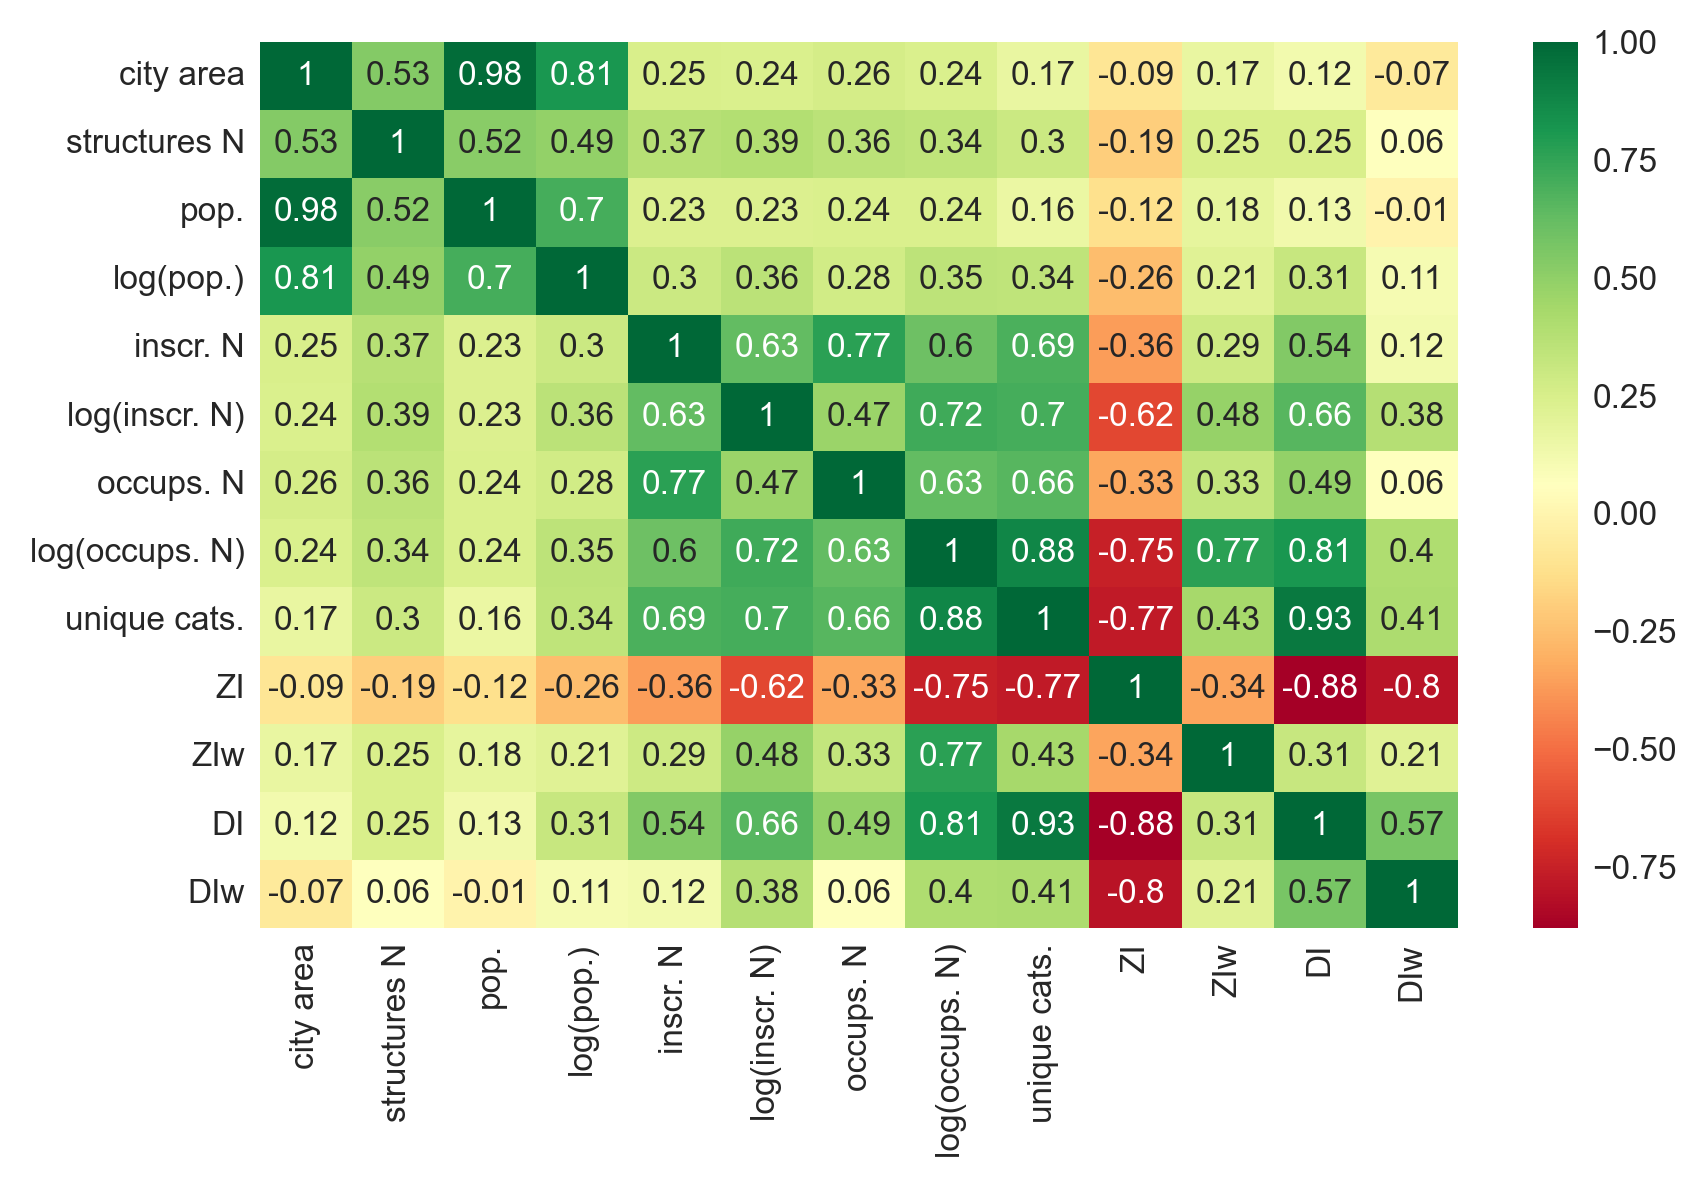

In [189]:
col_labels = ["city area", "structures N", "pop.", "log(pop.)", "inscr. N", "log(inscr. N)", "occups. N", "log(occups. N)", "unique cats.", "ZI", "ZIw", "DI", "DIw"]
fig,ax=plt.subplots(tight_layout=True)
sns.heatmap(corr_matrix, xticklabels=col_labels, yticklabels=col_labels, ax=ax, cmap="RdYlGn", annot=True)

In [162]:
from scipy.stats import pearsonr

In [186]:
def get_pvalue_matrix(df):
    df = df.dropna()._get_numeric_data()
    listlist_pvalues = []
    for r in df.columns:
        row_pvalues = []
        for c in df.columns:
            try:
                row_pvalues.append(round(pearsonr(df[r], df[c])[1], 2))
            except:
                row_pvalues.append(None)
        listlist_pvalues.append(row_pvalues)
    return pd.DataFrame(listlist_pvalues, columns=df.columns, index=df.columns)

In [187]:
pvalue_matrix = get_pvalue_matrix(roman_cities_wo_quant)
pvalue_matrix

,Area,num_of_structures,pop_est,pop_est_log,inscr_N,inscr_N_log,occups_N,occups_N_log,occups_cats_unique_N,ZI,ZIw,DI,DIw
Area,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.01,0.15,0.01,0.04,0.24
num_of_structures,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.03,0.00,0.00,0.74
pop_est,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.04,0.27,0.01,0.17,0.21
pop_est_log,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.01,0.01,0.00,0.96
inscr_N,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.15
inscr_N_log,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00
occups_N,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.62
occups_N_log,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00
occups_cats_unique_N,0.01,0.00,0.04,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00
ZI,0.15,0.03,0.27,0.01,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00


<AxesSubplot:>

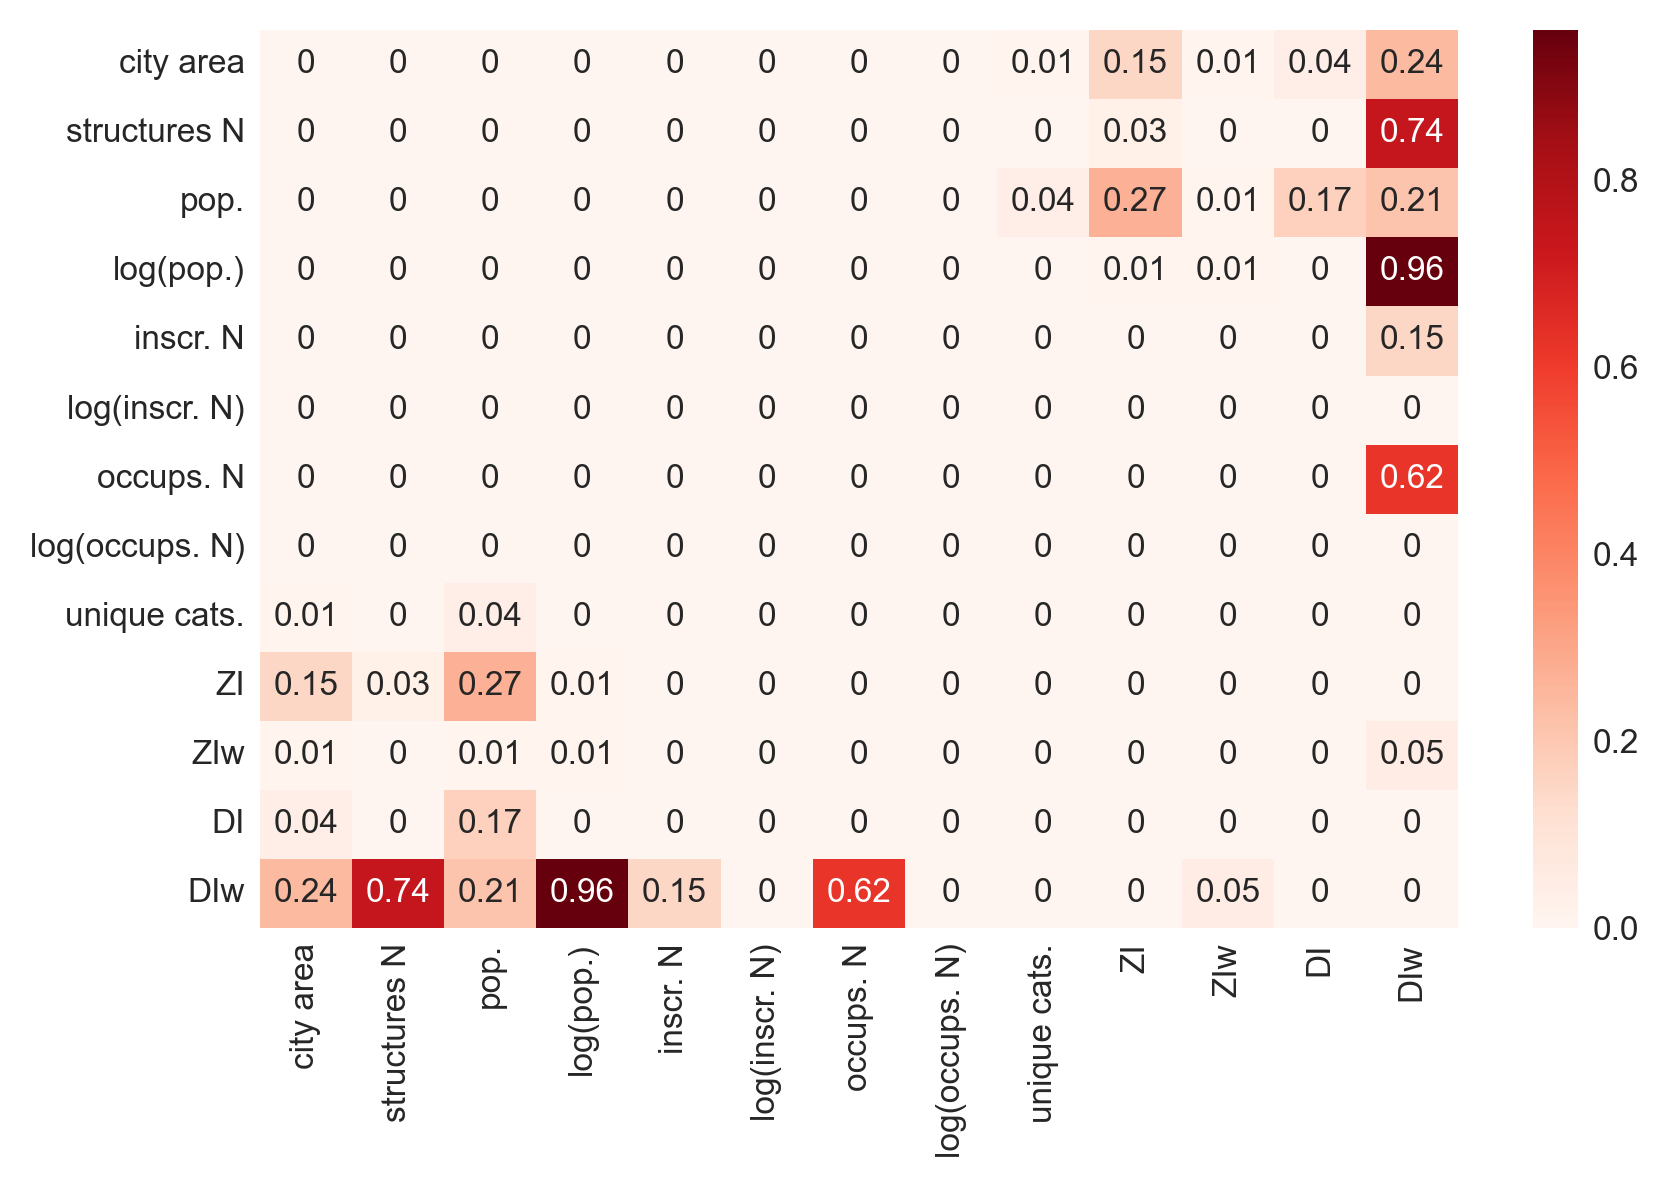

In [188]:
col_labels = ["city area", "structures N", "pop.", "log(pop.)", "inscr. N", "log(inscr. N)", "occups. N", "log(occups. N)", "unique cats.", "ZI", "ZIw", "DI", "DIw"]
fig,ax=plt.subplots(tight_layout=True)
sns.heatmap(pvalue_matrix, xticklabels=col_labels, yticklabels=col_labels, ax=ax, cmap="Reds", annot=True)

# Saguntum under scrutiny

In [192]:
roman_cities_wo[roman_cities_wo["Ancient Toponym"]=="Saguntum"]

,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Barrington Atlas Rank,Barrington Atlas Reference,Start Date,End Date,Select Bibliography,...,RZI_cat,shares_squared_vec,ZI2,ZI2_cat,RZI2,DI,RDI,ZIw,RZIw,DIw
724,Hanson2016_725,Saguntum,Sagunto,Hispania Tarraconensis,Spain,3,27 E2,-210,NaN,BNP; Brunt 1971; Carreras Monfort 1995-1996; C...,...,Metal-Working,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22.0,Metal-Working,100.965092,1.0,-2.058788e+16,4.459432,20.465769,0.224244


In [215]:
LIRE_sag = LIRE[LIRE["city_ID"]=="725"].copy()

In [216]:
len(LIRE_sag)

351

In [217]:
LIRE_sag["occups_N"].sum()

22

In [218]:
LIRE_sag[LIRE_sag["occups_N"]>0]

,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,...,small_city_ID,small_city_geo,small_city_dist,urban_context_alt,occups,occups_N,organizations,organizations_N,occups_cats,city_ID
28767,EDCS-09100370,"CIL 02-14, 00337 = CIL 02, 03841 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,{ },{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28768,EDCS-09100371,"CIL 02-14, 00337a = CIL 02-14, p 1025 = ELST 0...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,{ },{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28769,EDCS-09100372,"CIL 02-14, 00338 = CIL 02, 03842 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,{ },{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28770,EDCS-09100373,"CIL 02-14, 00339 = CIL 02, 03843 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,{ },{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28771,EDCS-09100374,"CIL 02-14, 00340 = CIL 02, 03844 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,{ },{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28772,EDCS-09100375,"CIL 02-14, 00341 = CIL 02, 03845 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,{ },{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28773,EDCS-09100376,"CIL 02-14, 00342 = CIL 02, 03846 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,liberti/libertae,{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28774,EDCS-09100377,"CIL 02-14, 00343 = CIL 02, 03847 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,{ },{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28775,EDCS-09100378,"CIL 02-14, 00344 = CIL 02, 03848 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,liberti/libertae,{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28776,EDCS-09100379,"CIL 02-14, 00345 = CIL 02, 03849 (p XLVII, 967...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,liberti/libertae,{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725


In [223]:
LIRE_sag[LIRE_sag["occups_N"]>0][["EDH-ID", "EDCS-ID", "publication", "clean_text_interpretive_word"]]

,EDH-ID,EDCS-ID,publication,clean_text_interpretive_word
28767,HD025118,EDCS-09100370,"CIL 02-14, 00337 = CIL 02, 03841 (p XLVII, LXX...",Antoniae Luci filiae Sergillae Pompeius Baloni...
28768,HD025118,EDCS-09100371,"CIL 02-14, 00337a = CIL 02-14, p 1025 = ELST 0...",Antoniae Luci filiae Sergillae Pompeius Baloni...
28769,HD025118,EDCS-09100372,"CIL 02-14, 00338 = CIL 02, 03842 (p XLVII, LXX...",Antoniae Luci filiae Sergillae Pompeius Baloni...
28770,HD025118,EDCS-09100373,"CIL 02-14, 00339 = CIL 02, 03843 (p XLVII, LXX...",Antoniae Luci filiae Sergillae Pompeius Baloni...
28771,HD025118,EDCS-09100374,"CIL 02-14, 00340 = CIL 02, 03844 (p XLVII, LXX...",Antoniae Luci filiae Sergillae Pompeius Baloni...
28772,HD025118,EDCS-09100375,"CIL 02-14, 00341 = CIL 02, 03845 (p XLVII, LXX...",Antoniae Luci filiae Sergillae Pompeius Baloni...
28773,HD025118,EDCS-09100376,"CIL 02-14, 00342 = CIL 02, 03846 (p XLVII, LXX...",Antoniae Luci filiae Sergillae Pompeius Baloni...
28774,HD025118,EDCS-09100377,"CIL 02-14, 00343 = CIL 02, 03847 (p XLVII, LXX...",Antoniae Luci filiae Sergillae Pompeius Baloni...
28775,HD025118,EDCS-09100378,"CIL 02-14, 00344 = CIL 02, 03848 (p XLVII, LXX...",Antoniae Luci filiae Sergillae Pompeius Baloni...
28776,HD025118,EDCS-09100379,"CIL 02-14, 00345 = CIL 02, 03849 (p XLVII, 967...",Antoniae Luci filiae Sergillae Pompeius Baloni...


In [222]:
LIRE_sag[LIRE_sag["occups_N"]>0]

,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,...,small_city_ID,small_city_geo,small_city_dist,urban_context_alt,occups,occups_N,organizations,organizations_N,occups_cats,city_ID
28767,EDCS-09100370,"CIL 02-14, 00337 = CIL 02, 03841 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,{ },{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28768,EDCS-09100371,"CIL 02-14, 00337a = CIL 02-14, p 1025 = ELST 0...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,{ },{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28769,EDCS-09100372,"CIL 02-14, 00338 = CIL 02, 03842 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,{ },{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28770,EDCS-09100373,"CIL 02-14, 00339 = CIL 02, 03843 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,{ },{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28771,EDCS-09100374,"CIL 02-14, 00340 = CIL 02, 03844 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,{ },{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28772,EDCS-09100375,"CIL 02-14, 00341 = CIL 02, 03845 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,{ },{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28773,EDCS-09100376,"CIL 02-14, 00342 = CIL 02, 03846 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,liberti/libertae,{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28774,EDCS-09100377,"CIL 02-14, 00343 = CIL 02, 03847 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,{ },{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28775,EDCS-09100378,"CIL 02-14, 00344 = CIL 02, 03848 (p XLVII, LXX...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,liberti/libertae,{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725
28776,EDCS-09100379,"CIL 02-14, 00345 = CIL 02, 03849 (p XLVII, 967...",Hispania citerior,Hispania citerior,Sagunt / Sagunto / Saguntum,"['Sagunt', 'Sagunto', 'Saguntum']",130,,liberti/libertae,{ },...,725,"[-0.277795, 39.676202]",1235.76,small,"[faber, faber]",2,[],0,"[Production and related workers, transport equ...",725


In [224]:
LIRE_sag[LIRE_sag["occups_N"]>0]["clean_text_interpretive_word_EDCS"].tolist()

['Antoniae Luci filiae Sergillae Pompeius Balonius Severus Balonius Marcellus Balonius Marcianus Sergius Crescens',
 'cius ius Cinnamus bius Probatus ius Dionysius ius Ianuarius enius Verus',
 'Antoniae Luci filiae Sergillae Lucius Terentius Fraternus adfini',
 'Sergiae Marci filiae Peregrinae Lucius Iulius Actius et Porcia Melete',
 'Sergiae Marci filiae Peregrinae Marcus Sergius Vetto amitae',
 'Lucio Antonio Luci filio Galeria Numidae praefecto fabrum tribuno militum legionis primae Italicae Marcus Sergius T et Sergia Sergilla',
 'Antoniae Luci filiae Sergillae Vegetus libertus',
 'Antoniae Luci filiae Sergillae Valeria Propinqua',
 'Sergiae Marci filiae Peregrinae Theomnestus et Lais et Didyme liberti',
 'Sergiae Marci filiae Peregrinae Theomnestus et Lais et Didyme liberti',
 'Lucio Antonio Luci filio Galeria Numidae praefecto fabrum tribuno militum legionis primae Italicae Lucius Rubrius Polybius amico']

In [232]:
LIRE[LIRE["EDH-ID"].notnull()].loc[LIRE.duplicated(subset="EDH-ID"), :]["EDH-ID"]

164      HD023503
204      HD052304
205      HD052304
206      HD052304
207      HD052304
           ...   
49017    HD003680
49056    HD055971
49162    HD044459
49239    HD013243
49425    HD003777
Name: EDH-ID, Length: 1115, dtype: object

In [228]:
len(LIRE[LIRE["EDH-ID"].notnull()])

53823

In [231]:
len(LIRE[LIRE["EDH-ID"].notnull()]["EDH-ID"].unique().tolist())

52708

In [233]:
edh_ids_list = LIRE[LIRE["EDH-ID"].notnull()]["EDH-ID"].tolist()

In [241]:
dup_ids = [id_tup[0] for id_tup in nltk.FreqDist(edh_ids_list).most_common() if id_tup[1] > 1]
len(dup_ids)

946